# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [10]:
#Importando as bibliotecas necessárias para a atividade.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [11]:
#Carregando o dataframe
prev_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
prev_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [12]:
#Verificando as dimensões do dataframe.
prev_renda.shape

(15000, 16)

In [13]:
#Avaliando as variáveis
prev_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [14]:
#Criando um dataframe com variáveis quantitativas.

prev_renda_quant = prev_renda[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]
prev_renda_quant.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


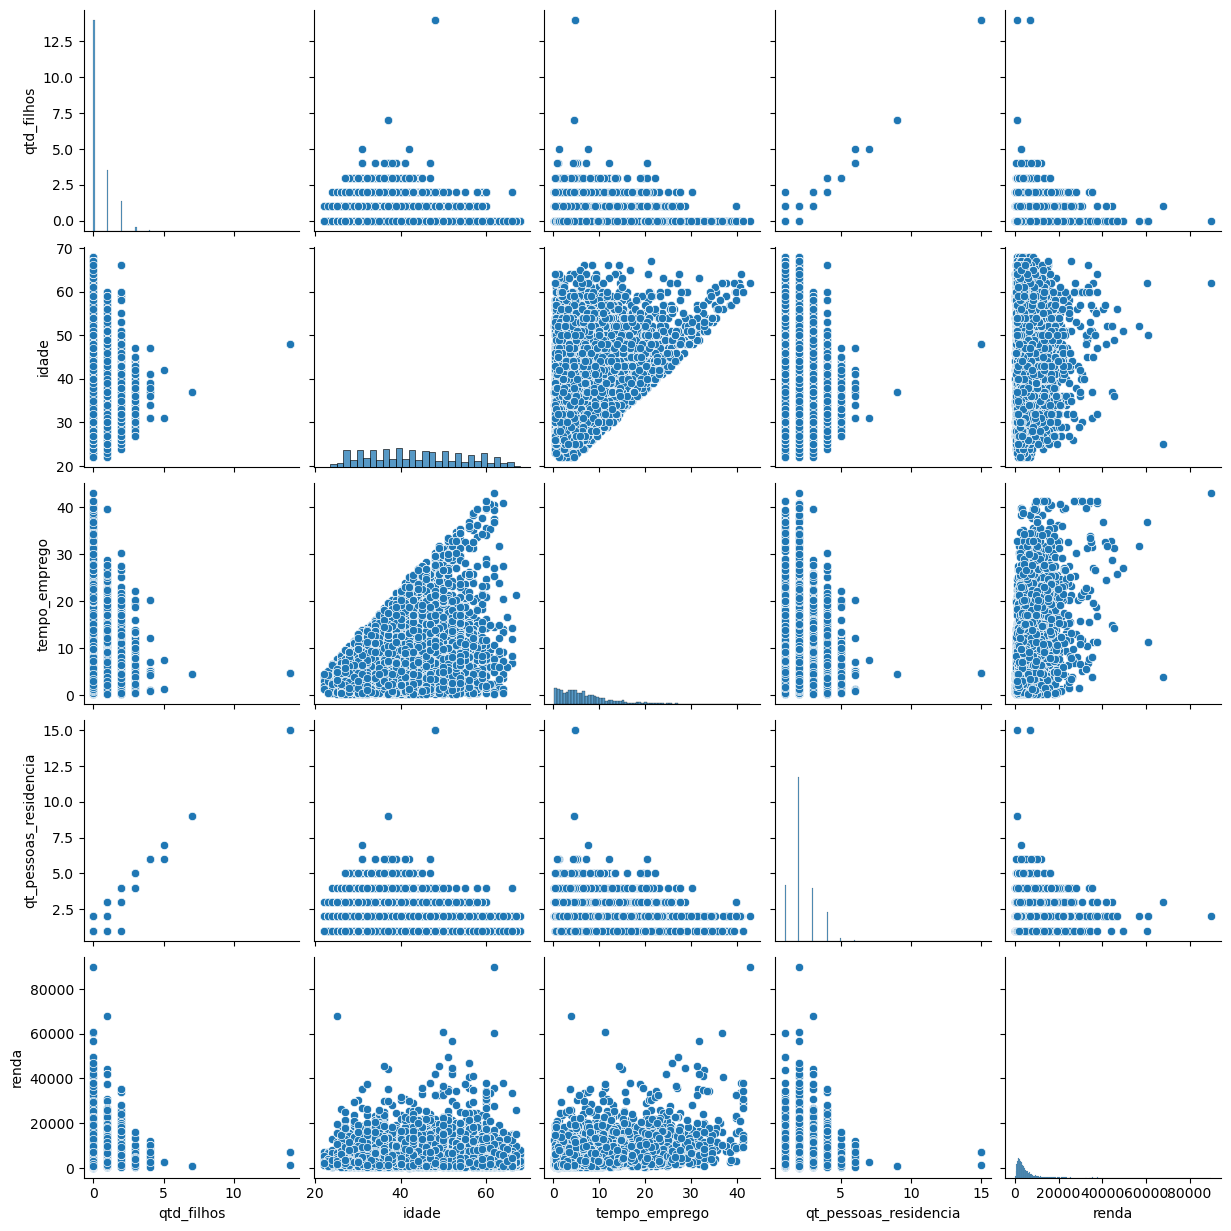

In [15]:
#Plotando a matriz de dispersão
sns.pairplot(prev_renda_quant)

In [16]:
#Analisando a correlação
prev_renda_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


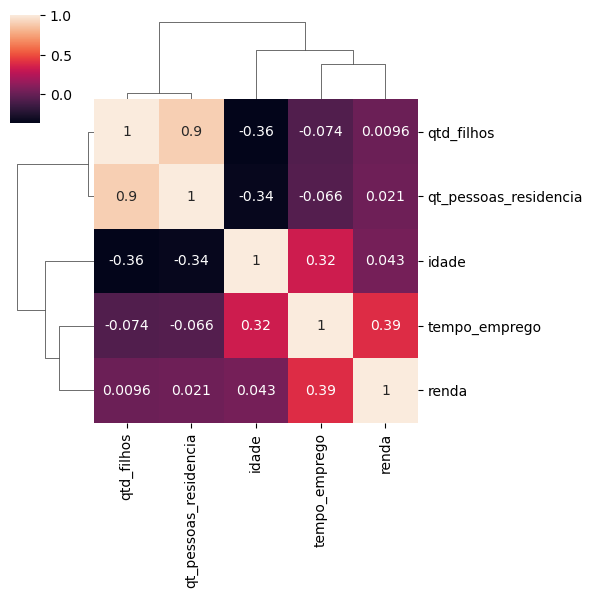

In [18]:
#Plotando a matriz de correlação
sns.clustermap(prev_renda_quant.corr(),figsize = (6,6), annot=True)

# Veja se você identifica algum padrão interessante ou que te faça sentido.

- Na coluna da renda é possível observar que existe uma correlação significativa com o tempo de emprego. O esperado é que uma pessoa com mais tempo no emprego tenha mais oportunidade de aumentar sua renda.
- Além disso ocorre uma correlação entre quantidade de pessoas na residência com o número de filhos, faz sentido quem tem mais filhos ter mais pessoas na sua residência.
- Da mesma forma podemos notar uma correlação entre tempo de emprego e idade que faz sentido pois pessoas com mais tempo de vida tiveram mais tempo para permanecer no mesmo trabalho.


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [19]:
#Criando um dataframe com as variáveis mais correlacionadas com a renda.
df = prev_renda [['tempo_emprego','idade']]
df.head()

,tempo_emprego,idade
0,3.575342,36
1,0.860274,42
2,8.065753,31
3,1.208219,50
4,13.873973,52


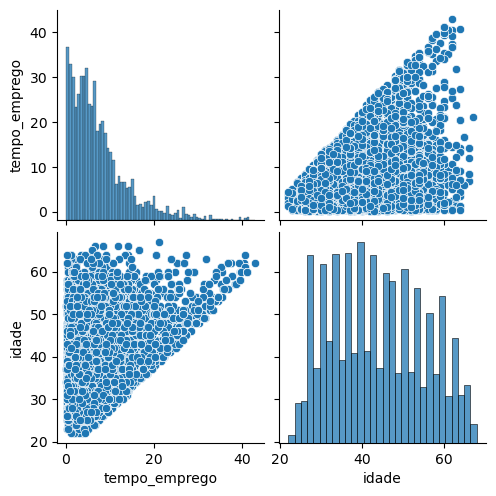

In [20]:
#Criando um gráfico de dispersão específico para as duas variáveis mais correlacionadas com renda.
sns.pairplot(df)

# Avaliando o gráfico de dispersão (scatterplot) específico para as duas variáveis mais correlacionadas com renda.

- Assim como na análise anterior podemos notar que pessoas com mais tempo de serviço tem mais idade.

3) Na su aopinião, há outliers na variável renda?

In [21]:
#Analisando características matemáticas para procurar outliers.
prev_renda_quant.agg(['min','max','mean'])

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
min,0.000000,22.0000,0.191781,1.000000,159.900000
max,14.000000,68.0000,42.906849,15.000000,89918.040000
mean,0.437267,43.8414,7.750462,2.219067,4624.632946


# Na sua opinião, há outliers na variável renda?
- Sim. Observando a linha correspondente a renda no gráfico de matriz de dispersão, que está no primeiro exercício, podemos notar pontos muito distantes dos demais. 
- Avaliando os valores mínimo, máximo e a média da coluna renda fica evidente a diferença entre os valores médios e os outros dois.


4) Calcule o logaritmo da variável renda e repita a sequência de análise

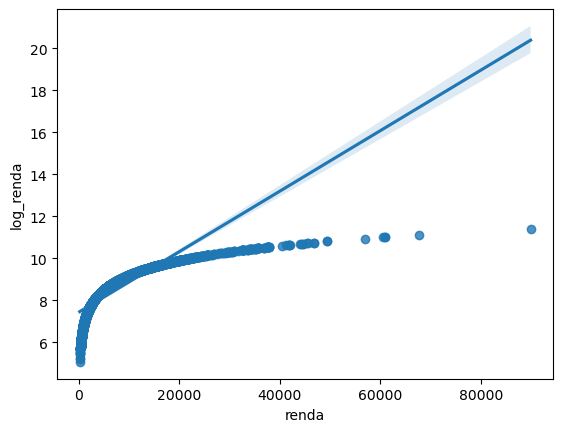

In [23]:
#Calculando o logaritmo da variável renda.
prev_renda_quant_log = prev_renda_quant.copy()
prev_renda_quant_log ['log_renda']= np.log(prev_renda_quant_log['renda'])


_ = sns.regplot(x='renda', y = 'log_renda',data= prev_renda_quant_log)

In [24]:
#Repetindo a sequência de análise (Correlação)
prev_renda_quant_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


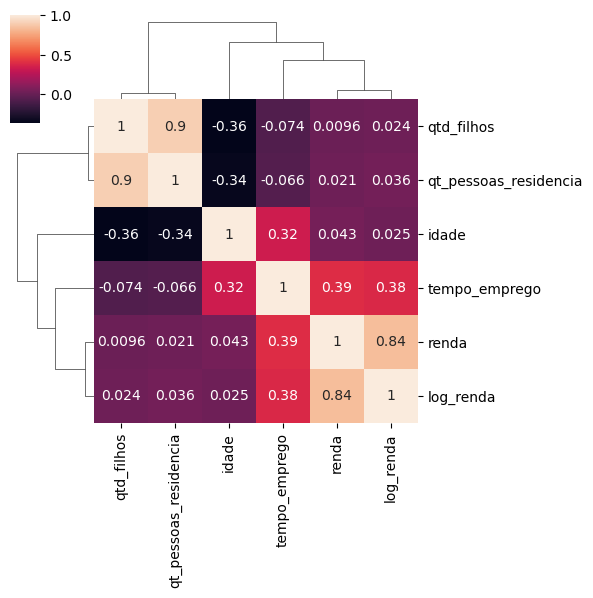

In [25]:
#Repetindo a sequência de análise (matriz de correlação em um clustermap)
sns.clustermap(prev_renda_quant_log.corr(), figsize = (6,6), annot= True)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

# Resposta

- No gráfico de dispersão a visualização melhorou, ficou mais clara e com possibilidade de comparação do log com a variável original, no restante não fui capaz de notar diferenças significativas.